In [0]:
import numpy as np
import matplotlib.pyplot as plt

preceptronAccuracyList = []
knnAccuracyList = []
lrAccuracyList = []
dtAccuracyList = []
nbAccuracyList = []


n_samples=1000

mean1 = [0, 0]
mean2 = [1, 0]
mean3 = [0, 1]
mean4 = [1, 1]
cluster_std=0.2

if 0:
  cluster_var = cluster_std**2
  cov = [[cluster_var, 0], [0, cluster_var]]  # diagonal covariance
  data1 = np.random.multivariate_normal(mean1, cov, n_samples//4)
  data2 = np.random.multivariate_normal(mean2, cov, n_samples//4)
  data3 = np.random.multivariate_normal(mean3, cov, n_samples//4)
  data4 = np.random.multivariate_normal(mean4, cov, n_samples//4)
  data = np.vstack([data1,data2,data3,data4])
  target = [i//(n_samples//4) for i in range(n_samples)]    #list comprehension
else:
  from sklearn.datasets import make_blobs
  data, target = make_blobs(n_samples=n_samples, n_features=2, 
                            centers=[mean1, mean2, mean3, mean4], cluster_std=cluster_std, random_state=1)

d = data.shape[1]

train_x = np.insert(data, 0, 1, axis=1)
train_y = np.asarray(target)
train_y=(train_y>=1)+0

eta=0.5     #learning grade
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

rng = np.random.RandomState(1)
w = rng.randn(1, d+1)/100
batch_update = True

for epoch in range(20):        #How many times to go over the dataset and update the weights
  numcorr=0
  dw=np.zeros(w.shape)
  for t in range(n_samples):
    r=train_y[t]
    x=train_x[t,:]
    y=sigmoid(np.dot(x,w.T))
    if (y>0.5 and r==1) or (y<=0.5 and r==0) :
      numcorr=numcorr+1     #this calculates the training accuracy
    delta=r-y
    if batch_update == True :
      dw=dw+x*delta           #accumulate the dw computed for each sample so that at the end of epoch we can make a more robust update
    else :
      w=w+eta*x*delta      
  if batch_update == True :
    w=w+eta*dw/n_samples
  print(numcorr)            #changing the weights with every epoch will improve this number

x=train_x[:,0]
#added in class 2/7/20
#chapter 9 slides 7/15
bestT = 0

for T in np.linspace(min(x), max(x), num=5): #For All Possible Splits
    parentH = -(p0*np.log2(p0) + p1*np.log2(p1))
    indices_left = x<=T
    indices_right = x>T 

    classlabels_left = train_y[indices_left]
    classlabels_right = train_y[indices_right]

    p0left = np.mean(classlabels_left==0)
    p1left = np.mean(classlabels_left==1)
    leftH = -(p0left*np.log2(p0left) + p1left*np.log2(p1left))
    
    p0right = np.mean(classlabels_right==0)
    p1right= np.mean(classlabels_right==1)
    rightH = -(p0right*np.log2(p0right) + p1right*np.log2(p1right))

    Nleft = len(indices_left)
    Nright = len(indices_right)
    N = Nleft = Nright
    InfoGain = parentH - leftH*(Nleft / N) - rightH*(Nright/N)

    #if InfoGain > best_so_far :
      #bestT = T
      #best_so_far = InfoGain
    #ginis.append(tmp)
    #leftH=sigmoid(np.dot(xw.T))
#if (y>0.5 and r==1) or (y<0.5 and r==0)
    #numcor=numcorr+1
#delta=r-y
#dw=dx+x*delta

from sklearn.neighbors import KNeighborsClassifier
  from sklearn.linear_model import LogisticRegression
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.naive_bayes import GaussianNB

760
760
760
760
761
761
762
763
763
764
764
766
766
767
768
769
770
770
772
775


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


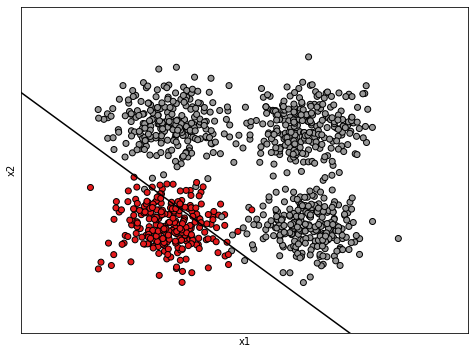

In [0]:
x_min, x_max = data[:, 0].min() - .5, data[:, 0].max() + .5
y_min, y_max = data[:, 1].min() - .5, data[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(data[:, 0], data[:, 1], c=train_y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('x1')
plt.ylabel('x2')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

xx = np.linspace(-5, 5)
yy=  (-w[0,0]-xx*w[0,1])/w[0,2]
plt.plot(xx, yy, 'k-')

p0=np.mean(train_y==0)
p1=np.mean(train_y==1)
